<a href="https://colab.research.google.com/github/Varunkrishna1412/Algo-Trail/blob/main/Digits%20Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape:{x_train.shape},Labels shape:{y_train.shape}")
print(f"Testing data shape:{x_test.shape},Labels shape:{y_test.shape}")

Training data shape:(60000, 28, 28),Labels shape:(60000,)
Testing data shape:(10000, 28, 28),Labels shape:(10000,)


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

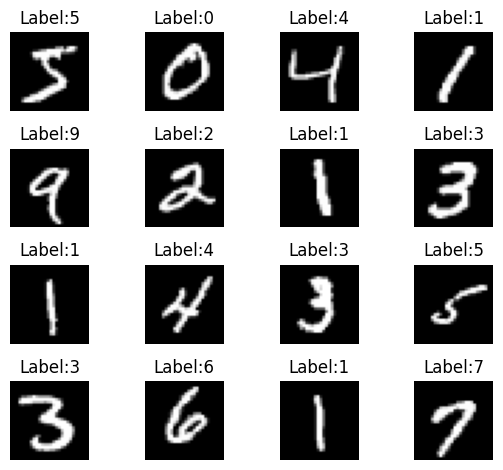

In [22]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i],cmap='grey')
  plt.title(f"Label:{y_train[i].argmax()}")
  plt.axis('off')
  plt.tight_layout()
  plt.show

In [15]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

Nueral Network  

In [23]:
model = Sequential([
    Flatten(input_shape=(28, 28)), #flattening the images into 1D
    Dense(128, activation='relu'), #1st hidden layer
    Dense(10, activation='softmax') #output layer for 10 classes
])
#compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary() #summary of the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [24]:
history = model.fit(x_train,y_train, epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8689 - loss: 0.4653 - val_accuracy: 0.9556 - val_loss: 0.1612
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9595 - loss: 0.1394 - val_accuracy: 0.9642 - val_loss: 0.1233
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9720 - loss: 0.0986 - val_accuracy: 0.9663 - val_loss: 0.1123
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9796 - loss: 0.0680 - val_accuracy: 0.9702 - val_loss: 0.0983
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9723 - val_loss: 0.0969
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.9772 - val_loss: 0.0793
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0315 - val_accuracy: 0.9767 - val_loss: 0.0840
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9926 - loss: 0.0246 -

Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


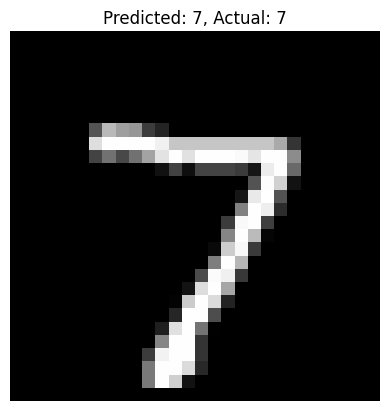

In [26]:
predict = model.predict(x_test)
sample_index = 0
plt.imshow(x_test[sample_index],cmap='gray')
plt.title(f"Predicted: {predict[sample_index].argmax()}, Actual: {y_test[sample_index].argmax()}")
plt.axis('off')
plt.show()